In [29]:
import numpy as np
import mne

# Load the preprocessed epochs from FIF files
epochs_train = mne.read_epochs('/srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_train-epo.fif', preload=True)
epochs_test = mne.read_epochs('/srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_test-epo.fif', preload=True)

# Extract the data as NumPy arrays
train_data = epochs_train.get_data()
test_data = epochs_test.get_data()

# Print statistics of the training data
print("Training Data Statistics:")
print("Mean:", np.mean(train_data))
print("Standard Deviation:", np.std(train_data))
print("Min:", np.min(train_data))
print("Max:", np.max(train_data))

# Print statistics of the test data
print("Test Data Statistics:")
print("Mean:", np.mean(test_data))
print("Standard Deviation:", np.std(test_data))
print("Min:", np.min(test_data))
print("Max:", np.max(test_data))


Reading /srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_train-epo.fif ...
    Found the data of interest:
        t =     -50.78 ...     601.56 ms
        0 CTF compensation matrices available
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Reading /srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_test-epo.fif ...
    Found the data of interest:
        t =     -50.78 ...     601.56 ms
        0 CTF compensation matrices available
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Training Data Statistics:
Mean: nan
Standard Deviation: nan
Min: nan
Max: nan
Test Data Statistics:
Mean: nan
Standard Deviation: nan
Min: nan
Max: nan


/tmp/ipykernel_1029129/54451144.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = epochs_train.get_data()
/tmp/ipykernel_1029129/54451144.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  test_data = epochs_test.get_data()


Reading /srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_train-epo.fif ...
    Found the data of interest:
        t =     -50.78 ...     601.56 ms
        0 CTF compensation matrices available
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Reading /srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_test-epo.fif ...
    Found the data of interest:
        t =     -50.78 ...     601.56 ms
        0 CTF compensation matrices available
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Number of epochs in training data: 166
Number of epochs in test data: 42


/home/mthakkar/mambaforge/bin/envs/image_decode/lib/python3.10/site-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


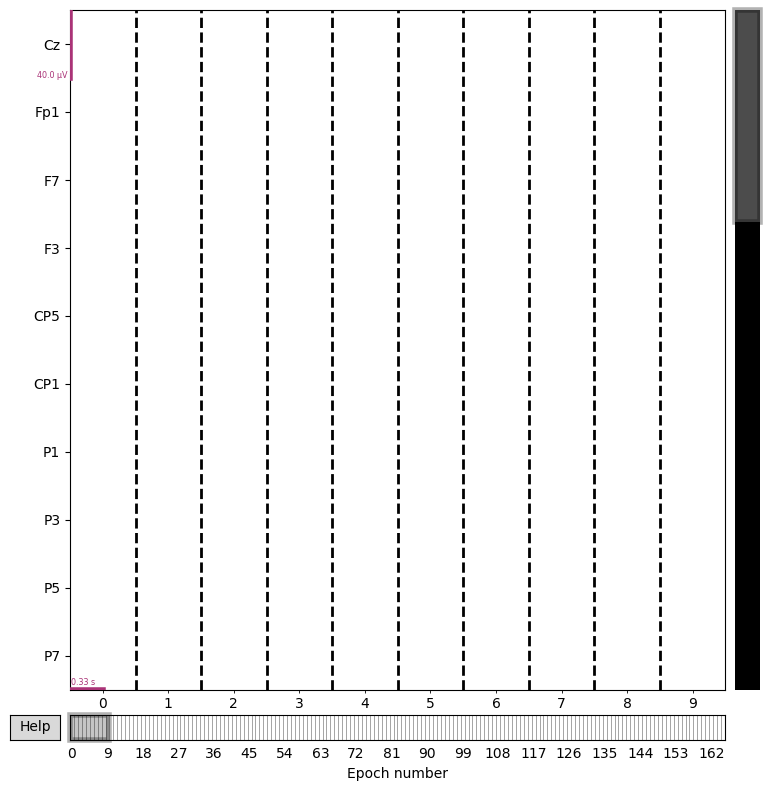

/home/mthakkar/mambaforge/bin/envs/image_decode/lib/python3.10/site-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


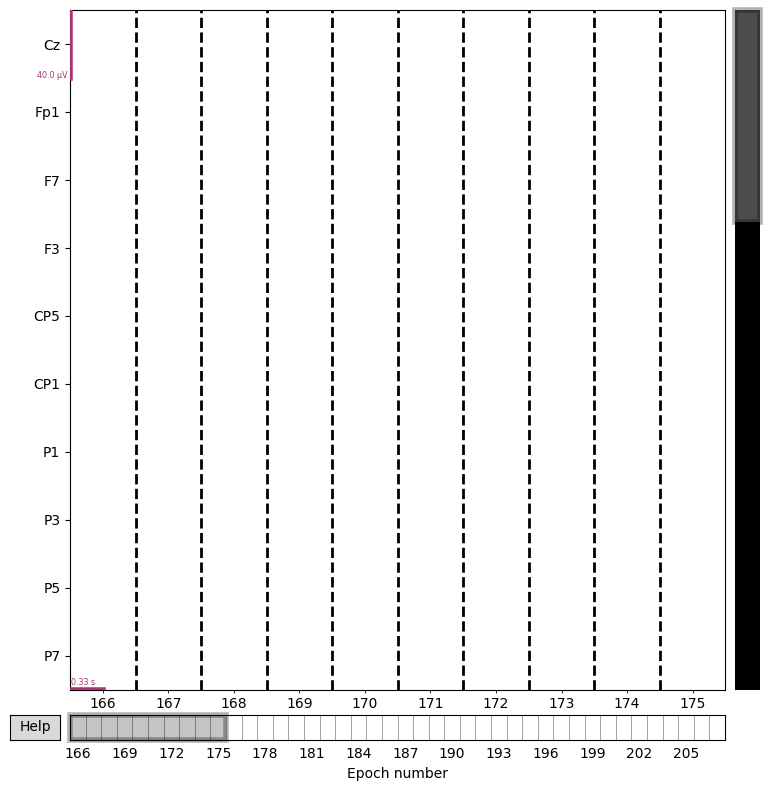

Shape of whitened_train_data: (166, 32, 168)
Shape of whitened_test_data: (42, 32, 168)
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated


/home/mthakkar/mambaforge/bin/envs/image_decode/lib/python3.10/site-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


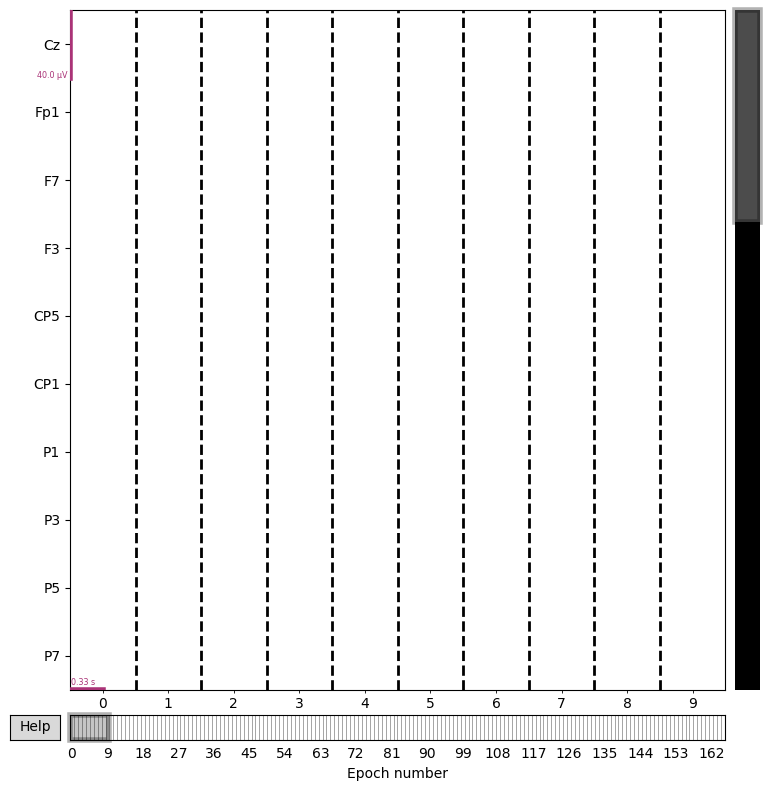

/home/mthakkar/mambaforge/bin/envs/image_decode/lib/python3.10/site-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


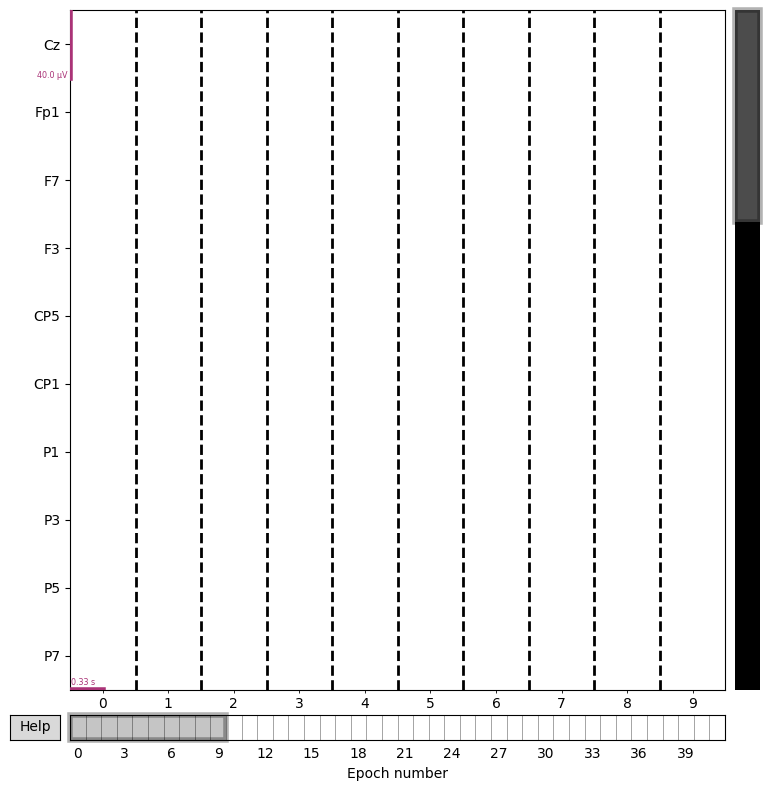

In [28]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned and whitened data
cleaned_file_path_train = "/srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_train-epo.fif"
cleaned_file_path_test = "/srv/eeg_reconstruction/mit/stimulus-emotiv/fif/subj01_session1_eeg_cleaned_test-epo.fif"
epochs_train = mne.read_epochs(cleaned_file_path_train, preload=True)
epochs_test = mne.read_epochs(cleaned_file_path_test, preload=True)

# Sanity check: Print the number of epochs
print("Number of epochs in training data:", len(epochs_train))
print("Number of epochs in test data:", len(epochs_test))

# Visualize the epochs
epochs_train.plot(n_epochs=10, n_channels=10, title='Training Data Epochs')
epochs_test.plot(n_epochs=10, n_channels=10, title='Test Data Epochs')

# Plot the whitened data to ensure it looks correct
whitened_train_data = np.load('/srv/eeg_reconstruction/mit/stimulus-emotiv/whitened_train.npy')[0]
whitened_test_data = np.load('/srv/eeg_reconstruction/mit/stimulus-emotiv/whitened_test.npy')[0]

print("Shape of whitened_train_data:", whitened_train_data.shape)
print("Shape of whitened_test_data:", whitened_test_data.shape)

# Create MNE Epochs objects from whitened data
info = epochs_train.info  # Assuming the info object is the same for both train and test data
whitened_epochs_train = mne.EpochsArray(whitened_train_data, info)
whitened_epochs_test = mne.EpochsArray(whitened_test_data, info)

# Visualize whitened epochs
whitened_epochs_train.plot(n_epochs=10, n_channels=10, title='Whitened Training Data Epochs')
whitened_epochs_test.plot(n_epochs=10, n_channels=10, title='Whitened Test Data Epochs')

plt.show()
